## Solving the Wave Equation

Consider the wave equation in one-dimension:
$$ \frac{\partial^2 \phi}{\partial x^2} = \frac{1}{v^2}\frac{\partial^2\phi}{\partial t^2} $$
which can be rearranged to the form:
$$ \frac{\partial^2 \phi}{\partial t^2} = v^2\frac{\partial^2\phi}{\partial x^2} $$
To solve this using FTCS method, we discretize the spatial derivative and then obtain a second-order differential equation as:
$$ \frac{d^2 \phi}{d t^2} = \frac{v^2}{a^2}[\phi(x+a,t) - 2\phi(x,t) + \phi(x-a,t)] $$
We can write this as two first-order differential equations:
$$ \frac{d\phi}{dt} = \psi(x,t),\qquad \frac{d\psi}{dt} = \frac{v^2}{a^2} [\phi(x+a,t) - 2\phi(x,t) + \phi(x-a,t)] $$ 
Finally, applying Euler's method, we get:
$$ 
\begin{align}
\phi(x,t+h) =& \phi(x,t) + h\psi(x,t) \\
\psi(x,t+h) =& \psi(x,t) + h\frac{v^2}{a^2} [\phi(x+a,t) - 2\phi(x,t) + \phi(x-a,t)] 
\end{align}
$$
Let us see what happens if we code this up!

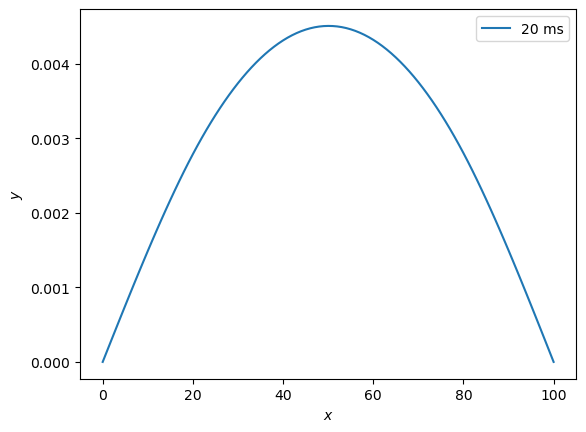

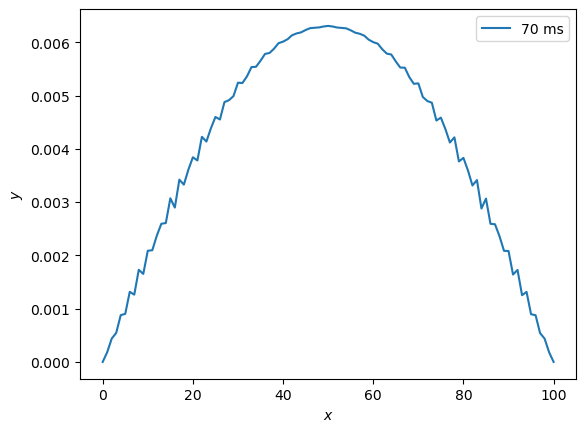

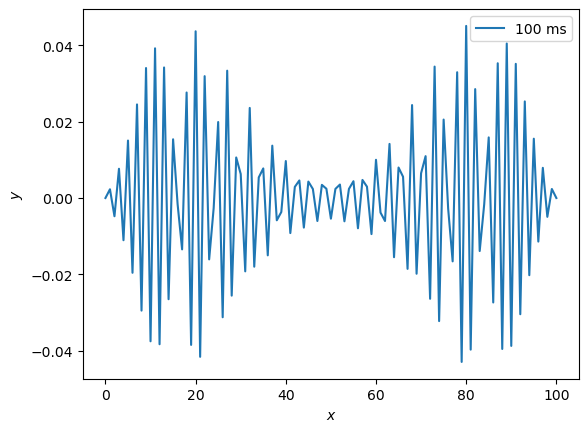

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
L = 0.01      # m, length of the string
V = 1e-1      # m/s
N = 100       # Number of divisions in grid
a = L/N       # Grid spacing
h = 1e-4      # Time-step
epsilon = h/1000

# parameters for the Gaussian function
C = 1.0       # velocity of the hammer strike in ms^-1 
d = 0.1       # Hammer distance from 0 to point of impact with string
sigma = 0.3   # sigma value in meters 

x  = np.arange(0,L,a)
y  = np.empty(N+1)
yp = np.empty(N+1)
v  = np.empty(N+1)
vp = np.empty(N+1)

# a simple gaussian function for the initial condition of the string
def y0(x): 
    return (C*x*(L-x)/(L**2))*np.exp((-(x-d)**2)/(2*sigma**2)) 

# boundary conditions
ys, ye = 0.0, 0.0     # Beginning and end height - fixed point 
vs, ve = 0.0, 0.0     # Beginning and end velocity 

# times when we wish to plot the temperature profile
t20  = 20e-3    # string at 20ms 
t70  = 70e-3    # string at 70ms
t100 = 100e-3   # string at 100ms
tend = t100 + epsilon

# Creation of empty array(s)
y[0], y[-1] = ys, ye
y[1:N] = np.zeros(N-1)
yp[0], yp[-1] = ys, ye
v[0], v[-1] = vs, ve
v[1:N] = y0(x)[1:N]
vp[0], vp[-1] = vs, ve

# Main loop
t = 0.0
D = h*V**2 / (a*a)

while t<tend:
    # Calculation the new values of y and v
    for i in range(1,N):
        yp[i] = y[i] + h*v[i]
        vp[i] = v[i] + D*(y[i+1]+y[i-1]-2*y[i])
    y, yp = yp, y
    v, vp = vp, v
    t += h

    # Plot creation in step(s)
    if abs(t-t20)<epsilon:
        plt.figure()
        plt.plot(y, label = "20 ms")
        plt.xlabel(r"$x$")
        plt.ylabel(r"$y$")
        plt.legend()
    if abs(t-t70)<epsilon:
        plt.figure()
        plt.plot(y, label = "70 ms")
        plt.xlabel(r"$x$")
        plt.ylabel(r"$y$")
        plt.legend()
    if abs(t-t100)<epsilon:
        plt.figure()
        plt.plot(y, label = "100 ms")
        plt.xlabel(r"$x$")
        plt.ylabel(r"$y$")
        plt.legend()

## von Neumann Stability Analysis

For a parabolic equation, like the heat diffusion equation, the FTCS method is numerically stable only if 
$$ h \leq \frac{a^2}{2D} $$
Applying this analysis to the more complex (hyperbolic) diffusion equation, we see that the FTCS method is **never numerically stable** -- except for very very short intervals of time!!